<a href="https://colab.research.google.com/github/ankitstar01/ml_test/blob/master/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

In [0]:
import librosa
import librosa.display

In [0]:
from scipy.io import wavfile

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip3 install pydub

In [26]:
from pydub import AudioSegment
t1 = 2
t2 = 5
t1 = t1 * 1000
t2 = t2 * 1000
newAudio = AudioSegment.from_wav('/content/drive/My Drive/tone.wav')
newAudio = newAudio[t1:t2]
newAudio.export('/content/drive/My Drive/newSong.wav', format="wav")

FileNotFoundError: ignored

In [0]:
y1, sr1 = librosa.load('/content/drive/My Drive/tone.wav')

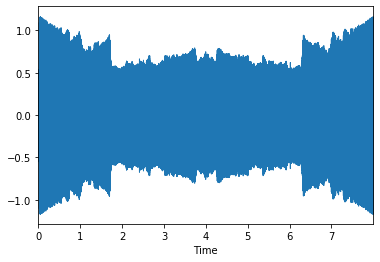

In [0]:
plt.figure()
librosa.display.waveplot(y1, sr=sr1)

In [0]:
y, sr = librosa.load('/content/drive/My Drive/newSong.wav')

In [3]:
plt.figure()
librosa.display.waveplot(y, sr=sr)

NameError: ignored

In [27]:
!pip install pydub
#required libraries
import urllib
import scipy.io.wavfile
import pydub
import urllib.request

#a temp folder for downloads
!mkdir data
temp_folder='data/'
#spotify mp3 sample file
web_file="http://p.scdn.co/mp3-preview/35b4ce45af06203992a86fa729d17b1c1f93cac5"

#download file
urllib.request.urlretrieve(web_file,temp_folder+"file.mp3")
#read mp3 file
mp3 = pydub.AudioSegment.from_mp3(temp_folder+"file.mp3")
#convert to wav
mp3.export(temp_folder+"file.wav", format="wav")
#read wav file
rate,audData=scipy.io.wavfile.read(temp_folder+"file.wav")

print(rate)
print(audData)

mkdir: cannot create directory ‘data’: File exists
44100
[[-480  686]
 [-213 1268]
 [-288 1221]
 ...
 [4484 4267]
 [4907 4697]
 [3300 3183]]


In [2]:
#wav length
audData.shape[0] / rate

30.0

In [4]:
audData.shape

(1323000, 2)

In [0]:

#wav number of channels mono/stereo
audData.shape[1]
#if stereo grab both channels
channel1=audData[:,0] #left
channel2=audData[:,1] #right

In [11]:
audData.dtype

dtype('int16')

In [0]:
#save wav file
scipy.io.wavfile.write(temp_folder+"file2.wav", rate, audData)
#save a file at half and double speed
scipy.io.wavfile.write(temp_folder+"file2.wav", int(rate/2), audData)
scipy.io.wavfile.write(temp_folder+"file2.wav", int(rate*2), audData)
#save a single channel
scipy.io.wavfile.write(temp_folder+"file2.wav", rate, channel1)

In [0]:
import numpy as np
#averaging the channels damages the music
mono=np.sum(audData.astype(float), axis=1)/2
scipy.io.wavfile.write(temp_folder+"file2.wav", rate, mono)

In [20]:

#Energy of music
np.sum(channel1.astype(float)**2)

116530853406515.0

In [18]:
#power - energy per unit of time
1.0/(2*(channel1.size)+1)*np.sum(channel1.astype(float)**2)/rate

998.6477630732448

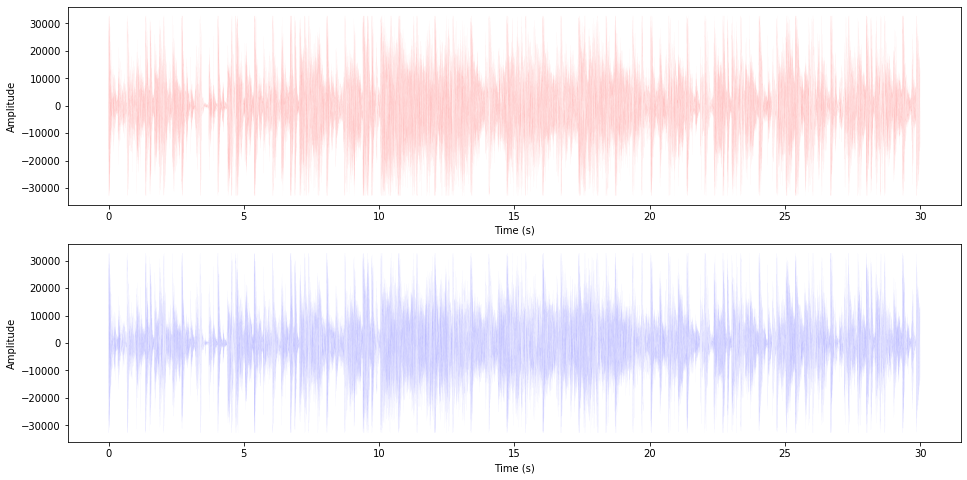

In [19]:
import matplotlib.pyplot as plt

#create a time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1) / rate

#plot amplitude (or loudness) over time
plt.figure(1,figsize=(16,8))
plt.subplot(211)
plt.plot(time, channel1, linewidth=0.01, alpha=1, color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time, channel2, linewidth=0.01, alpha=1, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

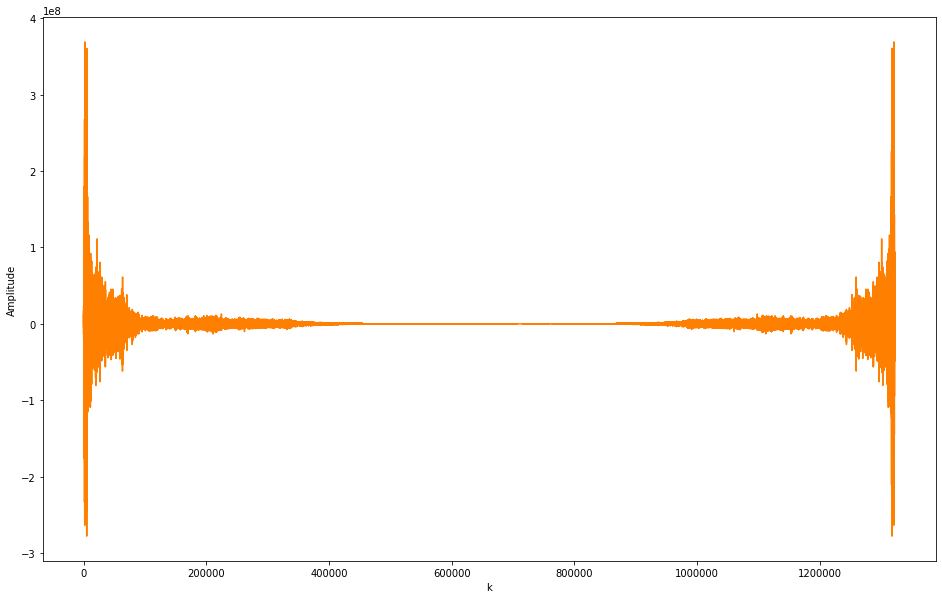

In [12]:
from numpy import fft as fft

fourier=fft.fft(channel1)
plt.figure(figsize=(16,10))
plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power (dB)')

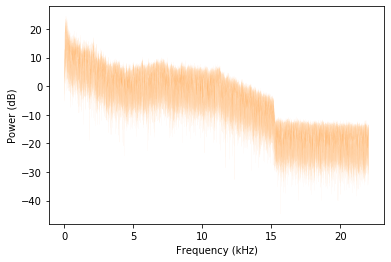

In [13]:
n = len(channel1)
fourier = fourier[0:int(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);
plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')




In [47]:
int(4.5)

4

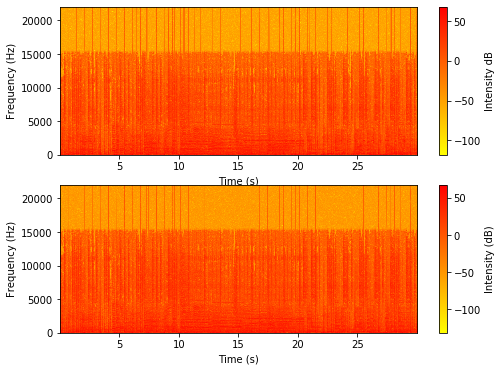

In [14]:

plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.subplot(212)
Pxx, freqs, bins, im = plt.specgram(channel2, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')
#plt.show()

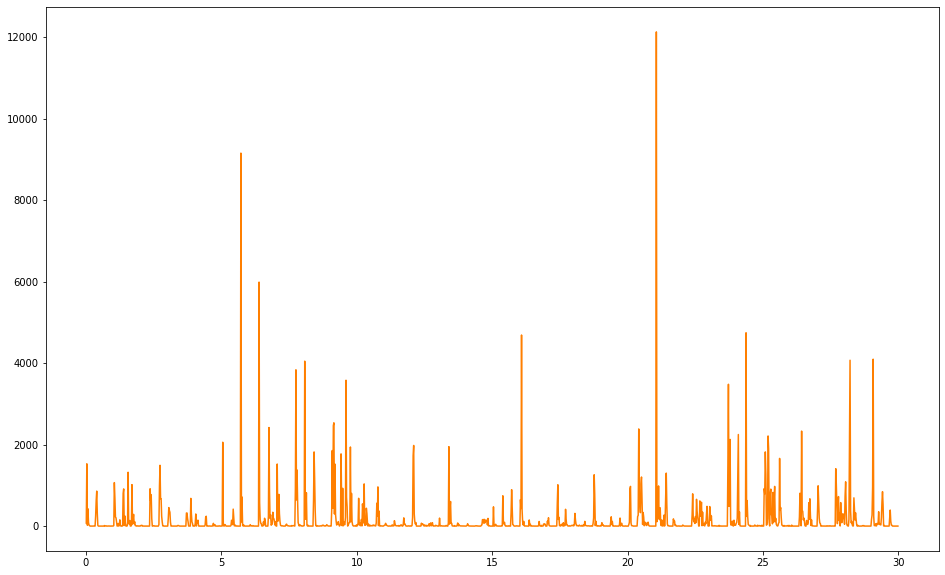

In [51]:
np.where(freqs==10034.47265625)
MHZ10=Pxx[233,:]
plt.figure(figsize=(16,10))
plt.plot(bins, MHZ10, color='#ff7f00')

In [21]:
!pip install moviepy

In [22]:
import sys
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)950272/45929032 bytes (2.1%)2695168/45929032 bytes (5.9%)5365760/45929032 bytes (11.7%)9084928/45929032 bytes (19.8%)12869632/45929032 bytes (28.0%)16801792/45929032 bytes (36.6%)20783104/45929032 bytes (45.3%)24748032/45929032 bytes (53.9%)28680192/45929032 bytes (62.4%)32571392/45929032 bytes (70.9%)36478976/45929032 bytes (79.4%)40370176/45929032 bytes (87.9%)44244

In [23]:
video = VideoFileClip(sys.argv[1]) # 2.
audio = video.audio # 3.
audio.write_audiofile(sys.argv[2]) # 4.

OSError: ignored

In [29]:
web_file="https://r4---sn-npoe7ned.googlevideo.com/videoplayback?expire=1580831554&ei=4j45Xqb4Eo_5wATq25OgDQ&ip=186.214.183.202&id=o-AJZ7FyrWQaZqLmxLW3M2EfbiBSTSIklztLnBir9HJGeB&itag=22&source=youtube&requiressl=yes&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=3273.293&lmt=1554533936856397&fvip=4&fexp=23842630&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRgIhAMvCKpk2ROqwqcHm-VSWkrxoUOFOe3-yW3biPbq-LXPLAiEA_bacXEvDBH4wP-u6vi-6cJVDvCtgakt94XD57Io69Y8%3D&contentlength=128065408&video_id=sRxaMDDMWQQ&title=MIT+Self-Driving+Cars-+State+of+the+Art+%282019%29&rm=sn-b8u-nn5l7z,sn-bg06e7z&req_id=ca2acf29a171a3ee&ipbypass=yes&redirect_counter=3&cm2rm=sn-qxay7z&cms_redirect=yes&mip=103.81.106.249&mm=34&mn=sn-npoe7ned&ms=ltu&mt=1580809886&mv=m&mvi=3&pl=24&lsparams=ipbypass,mip,mm,mn,ms,mv,mvi,pl&lsig=AHylml4wRQIgRmX4z7Uk8_yAk22IQUpqiKf3uoSk0Fc2wzXwpZZm7U4CIQCvLnr1n5BHFplrvlm_IRL_dgY9dUQBAwF8y9Gb7UqshA%3D%3D"

#download file
urllib.request.urlretrieve(web_file,temp_folder+"yotube.mp4")

('data/yotube.mp4', <http.client.HTTPMessage at 0x7f885df83c88>)

In [0]:
video = VideoFileClip(temp_folder+"yotube.mp4") # 2.

In [31]:
audio = video.audio # 3.
audio.write_audiofile(temp_folder+"yotube.mp3") # 4.

[MoviePy] Writing audio in data/yotube.mp3


100%|██████████| 72176/72176 [01:21<00:00, 889.45it/s] 

[MoviePy] Done.


In [33]:
!pip install pygame
from pygame import mixer  # Load the popular external library

mixer.init()
mixer.music.load(temp_folder+"yotube.mp3")
mixer.music.play()

     |████████████████████████████████| 11.4MB 26kB/s 
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


error: ignored

In [36]:
!pip install vlc
import vlc
p = vlc.MediaPlayer(temp_folder+"yotube.mp3")
p.play()

ERROR: Could not find a version that satisfies the requirement vlc (from versions: none)
ERROR: No matching distribution found for vlc


ModuleNotFoundError: ignored

ValueError: ignored